In [5]:
#!/usr/local/bin/python

import os, sys
import json
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import chainer
from chainer import cuda

import time
import cv2

xp = cuda.cupy

%matplotlib inline

In [11]:
sim_parent = '/mnt/Omer/Project/03.LinearRegionalCooling/SimulationResult/temp/'
directory_template = '20190415-%s'
device_temps = [-40]
temperatures = [9]
widths = [5]
times = [955, 965, 990, 1000]
num = 1

alpha = 0.0000001466 #水の熱拡散係数
rho_c = 4200000
cell_height = 0.00015
h = 290 #W/(m^2 K)
dt = 0.001
dx = 0.00015

small_mat = np.identity(200)*(-4)+np.tri(200,200,-1)-np.tri(200,200,-2)-np.tri(200,200,0)+np.tri(200,200,1)
def_mat = np.zeros((200*200, 200*200))
for i in range(200):
    for j in range(200):
        if i == j:
            def_mat[200*i:200*(i+1), 200*j:200*(j+1)] = small_mat
        if i-j == 1 or i-j == -1:
            def_mat[200*i:200*(i+1), 200*j:200*(j+1)] = np.identity(200)
            
sp_def_mat = sp.sparse.csr_matrix(def_mat)

In [12]:
for d_temp in device_temps:
    for temp in temperatures:
        for width in widths:
            for index, time1 in enumerate(times):
                temp_array = (np.ones((200, 200))*310.15).flatten()
                
                cooling_flag = 1

                print(directory_template%num)
                
                sim_path = os.path.join(sim_parent, directory_template%num)
                if not os.path.exists(sim_path):
                    os.makedirs(sim_path)

                #冷却領域
                temp_target = np.ones((420, 420)) * 310.15
                temp_target[210-width:211+width, 260:] = 273.15 + d_temp

                rows,cols = temp_target.shape
                M = cv2.getRotationMatrix2D((cols/2,rows/2),45*(index-1),1)
                dst = cv2.warpAffine(temp_target,M,(cols,rows))
                temp_target = dst[110:310, 110:310]

                temp_target = temp_target.flatten()
                mask = (temp_target < 300)*1
                
                #シミュレーション開始

                cuda.get_device(0).use()
                
                t = 0
                
                while t < 1001:
                    print '------------------{0}ms'.format(t)

                    if np.min(temp_array) < 310.15-temp:
                        cooling_flag = 0
                    if cooling_flag == 1:
                        temp_array = temp_array + alpha*dt/dx/dx*sp_def_mat.dot(temp_array) + dt/rho_c/cell_height*h*mask*(temp_target-temp_array)
                    else:
                        temp_array = temp_array + alpha*dt/dx/dx*sp_def_mat.dot(temp_array)

                    temp_array = temp_array.reshape((200, 200))
                    temp_array[0,:] = 310.15
                    temp_array[-1,:] = 310.15
                    temp_array[:,0] = 310.15
                    temp_array[:, -1] = 310.15

                    temp_array = temp_array.flatten()
                    
                    file_num = '{0:04d}'.format(t)
                    np.save(os.path.join(sim_path, '%s.npy' % file_num), temp_array.reshape((200, 200)))
                    
                    t += 1
                num += 1

20190415-1
------------------0ms
------------------1ms
------------------2ms
------------------3ms
------------------4ms
------------------5ms
------------------6ms
------------------7ms
------------------8ms
------------------9ms
------------------10ms
------------------11ms
------------------12ms
------------------13ms
------------------14ms
------------------15ms
------------------16ms
------------------17ms
------------------18ms
------------------19ms
------------------20ms
------------------21ms
------------------22ms
------------------23ms
------------------24ms
------------------25ms
------------------26ms
------------------27ms
------------------28ms
------------------29ms
------------------30ms
------------------31ms
------------------32ms
------------------33ms
------------------34ms
------------------35ms
------------------36ms
------------------37ms
------------------38ms
------------------39ms
------------------40ms
------------------41ms
------------------42ms
----------

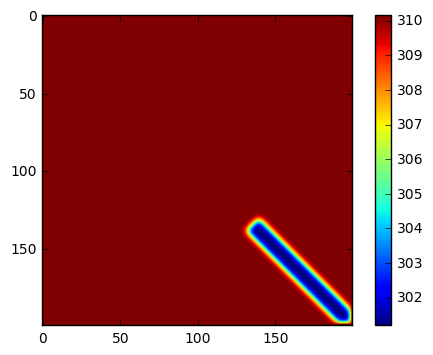

In [14]:
num = 450
a = np.load('/mnt/Omer/Project/03.LinearRegionalCooling/SimulationResult/temp/20190415-1/%s.npy' % "{0:04d}".format(num))
plt.imshow(a.reshape((200, 200)))
plt.colorbar()
# plt.imsave('/mnt/Omer/Project/03.LinearRegionalCooling/SimulationResult/temp/20171108-48/temp_%s_closeup.png' % num, a[:40, 80:120])

In [12]:
sim_parent = '/mnt/Omer/Project/03.LinearRegionalCooling/SimulationResult/temp/'
directory_template = '20181207-%s'
device_temps = [-40]
temperatures = [9, 6, 3]
widths = [5, 3, 1]
times = [920, 930, 955, 965]
num = 1

alpha = 0.0000001466 #水の熱拡散係数
rho_c = 4200000
cell_height = 0.00015
h = 290 #W/(m^2 K)
dt = 0.001
dx = 0.00015

small_mat = np.identity(200)*(-4)+np.tri(200,200,-1)-np.tri(200,200,-2)-np.tri(200,200,0)+np.tri(200,200,1)
def_mat = np.zeros((200*200, 200*200))
for i in range(200):
    for j in range(200):
        if i == j:
            def_mat[200*i:200*(i+1), 200*j:200*(j+1)] = small_mat
        if i-j == 1 or i-j == -1:
            def_mat[200*i:200*(i+1), 200*j:200*(j+1)] = np.identity(200)
            
sp_def_mat = sp.sparse.csr_matrix(def_mat)

In [14]:
for d_temp in device_temps:
    for temp in temperatures:
        for width in widths:
            for index, time1 in enumerate(times):
                temp_array = (np.ones((200, 200))*310.15).flatten()
                
                cooling_flag = 1

                print(directory_template%num)
                
                sim_path = os.path.join(sim_parent, directory_template%num)
                if not os.path.exists(sim_path):
                    os.makedirs(sim_path)

                #冷却領域
                temp_target = np.ones((420, 420)) * 310.15
                temp_target[210-width:211+width, 210:] = 273.15 + d_temp

                rows,cols = temp_target.shape
                M = cv2.getRotationMatrix2D((cols/2,rows/2),45*(index-1),1)
                dst = cv2.warpAffine(temp_target,M,(cols,rows))
                temp_target = dst[110:310, 110:310]

                temp_target = temp_target.flatten()
                mask = (temp_target < 300)*1
                
                #シミュレーション開始

                cuda.get_device(0).use()
                
                t = 0
                
                while t < 1001:
                    print '------------------{0}ms'.format(t)

                    if np.min(temp_array) < 310.15-temp:
                        cooling_flag = 0
                    if cooling_flag == 1:
                        temp_array = temp_array + alpha*dt/dx/dx*sp_def_mat.dot(temp_array) + dt/rho_c/cell_height*h*mask*(temp_target-temp_array)
                    else:
                        temp_array = temp_array + alpha*dt/dx/dx*sp_def_mat.dot(temp_array)

                    temp_array = temp_array.reshape((200, 200))
                    temp_array[0,:] = 310.15
                    temp_array[-1,:] = 310.15
                    temp_array[:,0] = 310.15
                    temp_array[:, -1] = 310.15

                    temp_array = temp_array.flatten()
                    
                    file_num = '{0:04d}'.format(t)
                    np.save(os.path.join(sim_path, '%s.npy' % file_num), temp_array.reshape((200, 200)))
                    
                    t += 1
                num += 1

20181207-1
------------------0ms
------------------1ms
------------------2ms
------------------3ms
------------------4ms
------------------5ms
------------------6ms
------------------7ms
------------------8ms
------------------9ms
------------------10ms
------------------11ms
------------------12ms
------------------13ms
------------------14ms
------------------15ms
------------------16ms
------------------17ms
------------------18ms
------------------19ms
------------------20ms
------------------21ms
------------------22ms
------------------23ms
------------------24ms
------------------25ms
------------------26ms
------------------27ms
------------------28ms
------------------29ms
------------------30ms
------------------31ms
------------------32ms
------------------33ms
------------------34ms
------------------35ms
------------------36ms
------------------37ms
------------------38ms
------------------39ms
------------------40ms
------------------41ms
------------------42ms
----------